# Hands-On
---

Hands-On ini digunakan pada kegiatan Microcredential Associate Data Scientist 2021

# Tugas Mandiri Pertemuan 16
---
Pertemuan 16 (enambelas) pada Microcredential Associate Data Scientist 2021 menyampaikan materi mengenai Membangun model: Evaluasi. silakan Anda kerjakan Latihan 1 s/d 5. Output yang anda lihat merupakan panduan yang dapat Anda ikuti dalam penulisan code :)

<h1> Soal 1: Pemahaman Tentang Model Evaluasi</h1>

Jawab pertanyaan di bawah ini dengan bahasa masing-masing?

1. Apa perbedaan antara data latih, data validasi, dan data test?
2. Bagaimana cara kita menilai performa suatu model?
3. Apa itu Confusion Matrix? Jelaskan secara lengkap!
4. Apa itu Classification Report dari sklearn?


 <p style="color:#FF0000">Jawab:</p>



---

1. 
  - Data Latih : Data yang digunakan untuk membangun model algoritma dalam pembelajarn mesin.
  - Data Validasi : Data yang digunakan sebagai input data baru ke dalam model yang belum dievaluasi sebelumnya, data validasi memberikan tes pertama dengan data yang tidak terlihat
  - Data test : Data yang digunakan untuk pengujian kembali untuk memvalidasi bahwa model yang dibuat dapat membuat prediksi yang akurat.

2.  Untuk model klasifikasi (classification metrics): accuracy, precision, recall, F1-score, ROC, AUC, dan lainnya. Untuk model regresi (regression metrics) : MSE, MAE, dan lainnya. Untuk model klastering (clustering metrics): Silhouette Coefficient, Davies-Bouldin Index, Dunn Index, dan lainnya.


3. Confusion Matrix adalah pengukuran performa untuk masalah klasifikasi machine learning dimana keluaran dapat berupa dua kelas atau lebih.  Confusion Matrix adalah tabel dengan 4 kombinasi berbeda dari nilai prediksi dan nilai aktual. Ada empat istilah yang merupakan representasi hasil proses klasifikasi pada confusion matrix yaitu True Positif, True Negatif, False Positif, dan False Negatif.

| TP | FP |
-----|-----
| FN | TN |

Keterangan :
- True Positive (TP): nilai sesungguhnya adalah positif dan diprediksi positif
- False Positive (FP): nilai sesungguhnya adalah negatif namun diprediksi positif
- True Negative (TN): nilai sesungguhnya adalah negatif dan diprediksi negatif, dan
- False Negative (FN): nilai sesungguhnya adalah positif namun diprediksi negatif.

4.  Classification Report digunakan untuk mengukur kualitas prediksi dari algoritma klasifikasi. Metrik precision digunakan untuk menghitung persentase akurasi model. Metrik recall digunakan untuk menghitung persentase kasus positif model. Metrik f1 score digunakan untuk menghitung prediksi positif yang benar.


<h1>Soal 2: Aplikasi Model Evaluasi</h1>

Kali ini kita akan menggunakan data untuk memprediksi kelangsungan hidup pasien yang telah mengalami operasi payudara. Dengan informasi yang dimiliki terkait pasien, kita akan membuat model untuk memprediksi apakah pasien akan bertahan hidup dalam waktu lebih dari 5 tahun atau tidak.

Lebih Lengkapnya kalian bisa membaca informasi tentang dataset di link berikut: https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.names

Buat model Klasifikasi (Model/Algoritma Bebas) untuk memprediksi status pasien dengan ketentuan sebagai berikut:

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
3. Pelajar tentang metrics roc_auc_score kemudian buatlah model dan evaluasi dengan menggunakan teknik cross-validation dengan scoring 'roc_auc'. Baca https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html untuk menggunakan metric roc_auc saat cross-validation.
3. Berapa score rata2 dari model dengan teknik cross-validation tersebut?
4. Prediksi data test dengan model yang telah kalian buat!
5. Bagaimana hasil confusion matrix dari hasil prediksi tersebut?
6. Bagaimana classification report dari hasil prediksi tersebut?
5. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive?
6. Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif?

### Load Dataset 

In [1]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [2]:
# tampilkan 5 baris awal dataset dengan function head()
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# hitung jumlah masing" data pada kolom survival_status
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

### Build Model

In [4]:
#import library train test split dan cross val
from sklearn.model_selection import train_test_split, cross_val_score

#import library Logistic regression
from sklearn.linear_model import LogisticRegression

#import library roc auc score
from sklearn.metrics import roc_auc_score

#import library scale
from sklearn.preprocessing import scale

#import library numpy
import numpy as np

In [5]:
## pemisahan feature dan target (data target : 'survival_status')
X = df.drop('survival_status', axis = 1)
Xs = scale(X)
y = df['survival_status']

#### NO 1

In [6]:
## pemisahan variabel test dan train dari data Xs dan y
# test size= 25%, random state = 42, dan stratify = y
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.25, random_state=42, stratify=y)

In [8]:
## pembuatan objek model
model_logReg = LogisticRegression(random_state = 42)

## latih model
model_logReg.fit(X_train, y_train)

## prediksi.
y_predict = model_logReg.predict(X_test)

#### NO 2

In [14]:
## menghitung cross_val_score dengan scoring = 'roc_auc'
## parameter cv = 10 
score = cross_val_score(model_logReg, X, y, scoring = 'roc_auc', cv = 10)
print(score)

[0.44021739 0.80978261 0.67391304 0.69021739 0.70380435 0.79292929
 0.875      0.62784091 0.67613636 0.61363636]


#### NO 3

In [15]:
# cetak rata-rata nilai rata-rata auc score
score.mean()

0.6903477711901624

#### NO 4

In [16]:
# Prediksi data test dengan model yang telah kalian buat 
auc_score = roc_auc_score(y_test, y_predict)
auc_score

0.5399122807017543

#### NO 5

In [17]:
# import library confusion matrix dan classification report
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
# apply confusion matrix dan cetak nilai confusion matrix
cm = confusion_matrix(y_test, y_predict, labels = (1,2))
cm

array([[53,  4],
       [17,  3]])

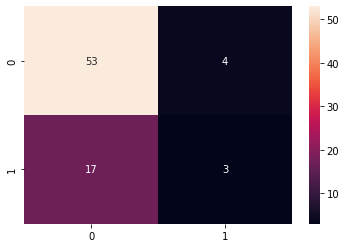

In [19]:
# visualisasikan nilai confusion matrix ke dalam diagram heatmap
import seaborn as sns
sns.heatmap(cm, annot=True)

#### NO 6

In [20]:
# cetak nilai classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.76      0.93      0.83        57
           2       0.43      0.15      0.22        20

    accuracy                           0.73        77
   macro avg       0.59      0.54      0.53        77
weighted avg       0.67      0.73      0.68        77



#### NO 7

- Bagaimana hasil confusion matrix dari hasil prediksi tersebut? <br>
Hasilnya ialah sebagai berikut :
1. TP (True Positive) atau data positif yang diprediksi benar sebanyal 52
2. FP (False Positive) atau data negative namun diprediksi sebagai data positif sebanyak 5
3. FN (False Negative) atau data positif namun diprediksi negatif sebanyak 17
4. TN (True Negative) data negatif yang diprediksi benar 3 
<br>
<br>
 
 
 
- Bagaimana classification report dari hasil prediksi tersebut? <br>
Hasilnya ialah :
1. Presisi (Persentasi prediksi data yang benar) :
  - class 1 = 75%, 
  - class 2 = 38%
2. Recall (Persentasi dari kasus positif benar yang didapat): 
  - class 1 : 91%
  - class 2 : 15%
3. f1-Score (Persentasi dari prediksi positif yang benar)⁉
  - class 1 : 83%
  - class 2 : 21%
4. support (Jumlah kemunculan kelas dalam kumpulan data) : 
  - class 1 : 57
  - class 2 : 20
5. Akurasi dengan f1-score ialah 0.7
<br><br>


- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status positive? dari hasil classification_report diatas <br>
Untuk status positif model prediksi cukup baik dapat dilihati dari tingginya nilai recall dan f1-score yang tinggi
<br><br>


 
 
- Seberapa baik model anda dalam memprediksi seorang pasien mempunyai status negatif? dari hasil classification_report diatas<br>
Untuk status negatif model prediksi memiki performa yang kurang baik dapat dilihat dari nilai recall dan f1-scorenya, hal ini mungkin dapat disebabkan data yang unbalanced


---

<h1> Soal 3: Pemahaman Tentang Model Selection</h1>

Jelaskan dengan bahasa sendiri!

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?


 <p style="color:#FF0000">Jawab</p>




---



1.   Bias adalah perbedaan antara rata rata hasil prediksi dari model ML yang kita develop dengan data nilai yang sebenarnya. Variance adalah variabel dari prediksi model untuk data tertentu dimana memberikan kita informasi perserbaran data kita.
2.   Overfitting terjadi karena model yang dibuat terlalu fokus pada training dataset tertentu, hingga tidak bisa melakukan prediksi dengan tepat jika diberikan dataset lain yang serupa. Underfitting adalah keadaan dimana model pelatihan data yang dibuat tidak mewakilkan keseluruhan data yang akan digunakan nantinya. Sehingga menghasilkan performa yang buruk dalam pelatihan data.
3.  Dengan mengurangi fitur data dapat mengurangi kompleksitas model. Sedangkan untuk menambah kompleksitas model dapat dilakukan dengan cara meningkatkan jumlah dan ukuran *layer* yang digunakan dalam model *neural network*, atau jumlah dan kedalaman *tree* yang digunakan dalam model *random forest*.
4.  Model ML harus memberikan prediksi akurat dan dapat mengeneralisir data uji yang selalu baru dan berubah.
5.  Jika memiliki kombinasi parameter yang kecil, kemungkinan value besar, dan model yang memakan waktu pemrosesan lama, sebaiknya menggunakan RandomSearchCV. Jika kombinasi parameter besar, kemungkinan value kecil, dan waktu pemrosesan model cepat, maka gunakan GridSearchCV. Jika waktu latih model cepat, dan memiliki gambaran nilai optimal, maka dapat menggunakan GridSearchCV.



<h1> Soal 4: Aplikasi Model Selection</h1>

1. Bagi kedua data berikut ini menjadi data training dan data test dengan test_size=0.25.
2. Import library KNN dan GridSearchCV.
3. Gunakan algoritma KNN dan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas

10. Berapa nilai score roc_auc untuk data test? (y_predict)
11. Apakah model anda termasuk baik, overtting, atau underfitting?


### Load Dataset 

In [35]:
# import library pandas
import pandas as pd

# Load Dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df2 = pd.read_csv(url, names=list_cols)

In [36]:
# tampilkan 5 baris awal dataset dengan function head()
df2.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [37]:
# hitung jumlah masing" data pada kolom survival_status
df2['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

#### NO 1

In [38]:
# 1. pembagian variabel train dan test
# test size= 25%, random state = 42, dan stratify = y
X = df2.drop('survival_status', axis = 1)
y = df2['survival_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#### NO 2

In [39]:
# 2. import library KNN dan GridSearchCv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

#### NO 3 - 6

In [40]:
# 3. tuning hyperparameter dengan GridSearchCV (parameter cv=10)
## build model KNN
model_knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : np.arange(3,51), 'weights' : ['uniform','distance']}
gscv = GridSearchCV(model_knn, param_grid, scoring='roc_auc', cv = 10)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

#### NO 7

In [41]:
# 7. parameter terbaik
gscv.best_params_

{'n_neighbors': 44, 'weights': 'distance'}

#### NO 8

In [42]:
# 8. score validasi terbaik
gscv.best_score_

0.7328256302521009

#### NO 9

In [43]:
# 9. prediksikan probabilitas masing-masing data test
y_predict = gscv.predict_proba(X_test)
y_predict

array([[0.83243084, 0.16756916],
       [0.82948389, 0.17051611],
       [0.83654015, 0.16345985],
       [0.88637563, 0.11362437],
       [0.79353081, 0.20646919],
       [0.85764058, 0.14235942],
       [1.        , 0.        ],
       [0.91059345, 0.08940655],
       [1.        , 0.        ],
       [0.40791879, 0.59208121],
       [0.74847637, 0.25152363],
       [0.85851565, 0.14148435],
       [0.74381719, 0.25618281],
       [0.39343436, 0.60656564],
       [0.87592463, 0.12407537],
       [0.83027157, 0.16972843],
       [0.81891568, 0.18108432],
       [0.84789266, 0.15210734],
       [0.81972569, 0.18027431],
       [0.54389078, 0.45610922],
       [0.75882428, 0.24117572],
       [0.81902643, 0.18097357],
       [1.        , 0.        ],
       [0.876866  , 0.123134  ],
       [0.48249566, 0.51750434],
       [0.45003424, 0.54996576],
       [0.57543564, 0.42456436],
       [1.        , 0.        ],
       [0.81528165, 0.18471835],
       [0.91817378, 0.08182622],
       [1.

In [44]:
# nilai rata-rata probabilitas data test
y_predict.mean()

0.5

#### NO 10

In [45]:
# 10. nilai score roc_auc 
kurang_5th = y_predict[:,1]
print(kurang_5th)

[0.16756916 0.17051611 0.16345985 0.11362437 0.20646919 0.14235942
 0.         0.08940655 0.         0.59208121 0.25152363 0.14148435
 0.25618281 0.60656564 0.12407537 0.16972843 0.18108432 0.15210734
 0.18027431 0.45610922 0.24117572 0.18097357 0.         0.123134
 0.51750434 0.54996576 0.42456436 0.         0.18471835 0.08182622
 0.         0.12407537 0.         0.32365645 0.18510126 0.
 0.08598644 0.16299863 0.34549723 0.28399464 0.13570151 0.32815
 0.29270146 0.67340073 0.14847957 0.12473245 0.1342232  0.
 0.14412323 0.18529338 1.         0.41369782 0.21534365 0.1726462
 0.06934707 0.21228668 0.40228092 0.14180065 0.13197082 0.14287676
 0.20849651 0.18027431 0.15104146 0.12348324 0.19489063 0.
 0.38934982 0.2209358  0.60105079 0.25547443 0.13157023 0.34982587
 0.21589415 0.0855198  0.22196137 0.23216426 0.13983004]


#### NO 11 

In [46]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors= 44, weights="distance")
knn.fit(X_train, y_train)

cv_dict = cross_validate(knn, X, y, return_train_score=True)
cv_dict

{'fit_time': array([0.00476003, 0.00242162, 0.00251698, 0.00233078, 0.00236988]),
 'score_time': array([0.0034647 , 0.00294065, 0.00311852, 0.00469446, 0.002882  ]),
 'test_score': array([0.74193548, 0.7704918 , 0.73770492, 0.78688525, 0.73770492]),
 'train_score': array([0.9795082 , 0.98367347, 0.97959184, 0.97959184, 0.98367347])}

 <p style="color:#FF0000">Jawab</p>
 Dari hasil cross validation di atas, model yang dibuat termasuk baik.


<h1> Soal 5: </h1>


1. Ulangi tahap di atas (soal 4, no 1 - 8) namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
2. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

#### NO 1

In [54]:
# 1. import algoritma DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


In [55]:
# Build model decision tree classifier 
model_tree = DecisionTreeClassifier()
params = {'criterion' : ['entropy','gini'], 'splitter' : ['best', 'random'],
         'min_samples_split' : np.arange(2,50)}
gscv = GridSearchCV(model_tree, param_grid = params, cv = 10, scoring = "roc_auc")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [56]:
# parameter terbaik
gscv.best_params_

{'criterion': 'gini', 'min_samples_split': 38, 'splitter': 'random'}

In [57]:
# score validasi terbaik
gscv.best_score_

0.7451855742296918

#### NO 2

 <p style="color:#FF0000">Jawab</p>


In [77]:
tree = DecisionTreeClassifier(criterion="gini",min_samples_split=39, splitter="random")
tree.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=39, splitter='random')

In [78]:
score_knn = cross_val_score(knn, X, y, scoring = 'roc_auc', cv = 10)
score_gscv = cross_val_score(tree, X, y, scoring = 'roc_auc', cv = 10)

In [79]:
print(score_knn.mean(), score_gscv.mean())

0.7029795234958278 0.682887296881862


Pada kasus ini, score model KNN sedikit lebih baik dibandingkan model Descision Tree.